## Ejercicio de redes neuronales densas con TF & Keras

### El objetivo es crear un modelo de Red Neuronal Densa capaz de predecir con alta precision si un potencial cliente va a pagar o no su prestamo

In [1]:
#Imports


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

### Descripcion de los campos del DF

In [3]:
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [4]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

In [6]:
le = len(df)

#Analizo los datos faltantes por categoria

(df.isna().sum()[df.isna().sum()>0]*100/le).sort_values(ascending=False)

mort_acc                9.543469
emp_title               5.789208
emp_length              4.621115
title                   0.443148
pub_rec_bankruptcies    0.135091
revol_util              0.069692
dtype: float64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


## Veamos que tan desbalanceada esta la muestra

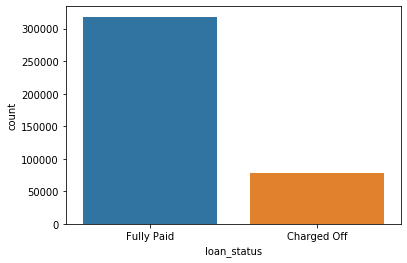

In [8]:
sns.countplot(x='loan_status', data=df)

## Empiezo por analizar las columnas con datos faltantes, de manera descendente

mort_acc                9.54%
emp_title               5.78%
emp_length              4.62%
title                   0.44%
pub_rec_bankruptcies    0.13%
revol_util              0.06%

### mort_acc

In [9]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [10]:
df.corr()['mort_acc'].sort_values(ascending=False)[1:]

total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

Parece haber una correlacion positiva fuerte con 'total_acc', la voy a usar para rellanar valores con la media correspondiente

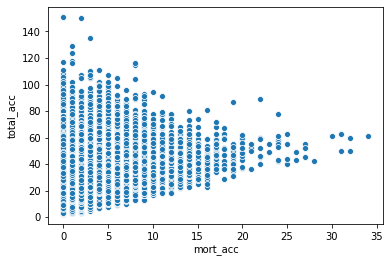

In [11]:
sns.scatterplot(x='mort_acc', y='total_acc', data=df)

In [12]:
tot_acc_mort_acc = df.groupby('total_acc').mean()['mort_acc']

tot_acc_mort_acc

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [13]:
def func(mort_acc, total_acc):
    if np.isnan(mort_acc):
        return tot_acc_mort_acc[total_acc]
    else:
        return mort_acc       

In [14]:
df['mort_acc_2'] = df.apply(lambda df: func(df.mort_acc, df.total_acc), axis=1)

In [15]:
df[['mort_acc','mort_acc_2']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 2 columns):
mort_acc      358235 non-null float64
mort_acc_2    396030 non-null float64
dtypes: float64(2)
memory usage: 6.0 MB


In [16]:
df.drop('mort_acc', axis=1, inplace=True)

### emp_title

In [17]:
df['emp_title'].value_counts()[df['emp_title'].value_counts()>300]

Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
Supervisor                  1830
Sales                       1638
Project Manager             1505
Owner                       1410
Driver                      1339
Office Manager              1218
manager                     1145
Director                    1089
General Manager             1074
Engineer                     995
teacher                      962
driver                       882
Vice President               857
Operations Manager           763
Administrative Assistant     756
Accountant                   748
President                    742
owner                        697
Account Manager              692
Police Officer               686
supervisor                   673
Attorney                     667
Sales Manager                665
sales                        645
Executive Assistant          642
Analyst                      623
Store Mana

Parecen haber muchos valores distintos para emp_title, lo voy a dropear

In [18]:
df.drop('emp_title', axis=1, inplace=True)

### emp_length

In [19]:
df['emp_length'].value_counts().sort_values(ascending=False)

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

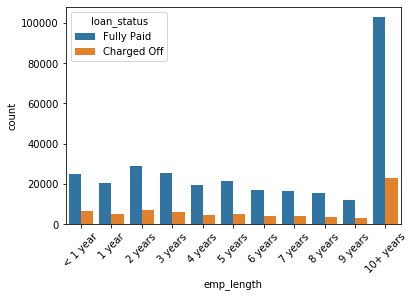

In [20]:
#plt.figure(figsize=(3,2),dpi=150)
sns.countplot(x='emp_length', data=df,hue='loan_status',  order=['< 1 year', '1 year', '2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years'])
plt.xticks(rotation=45)

In [21]:
CO = df[df['loan_status']=='Charged Off'].groupby('emp_length').count().loan_amnt

In [22]:
FP = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count().loan_amnt

In [23]:
res = 100*FP/(FP + CO)
res

emp_length
1 year       80.086547
10+ years    81.581390
2 years      80.673794
3 years      80.476867
4 years      80.761523
5 years      80.781279
6 years      81.080562
7 years      80.522600
8 years      80.023998
9 years      79.952984
< 1 year     79.312845
Name: loan_amnt, dtype: float64

No se aprecia diferencia significativa entre los ratios de pago variando el emp_length. Lo dropeo

In [24]:
df.drop('emp_length', axis=1, inplace=True)

### title

In [25]:
df.title.value_counts()[df.title.value_counts()>10]

Debt consolidation         152472
Credit card refinancing     51487
Home improvement            15264
Other                       12930
Debt Consolidation          11608
                            ...  
Deb Consolidation              11
Daniel Defense                 11
Debt Console                   11
Credit Relief                  11
2nd Loan                       11
Name: title, Length: 968, dtype: int64

In [26]:
df.drop('title', axis=1, inplace=True)

In [27]:
le = len(df)

#Analizo los datos faltantes por categoria

(df.isna().sum()[df.isna().sum()>0]*100/le).sort_values(ascending=False)

pub_rec_bankruptcies    0.135091
revol_util              0.069692
dtype: float64

Al ser los prestamos con datos faltantes menos del 0,2% los elimino.

In [28]:
df.dropna(axis=0, inplace=True)

In [29]:
df.isna().sum().sum()

0

# Habiendo terminado con los Nan, procedo al EDA

### 1 - Loan amount

In [30]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'pub_rec_bankruptcies',
       'address', 'mort_acc_2'],
      dtype='object')

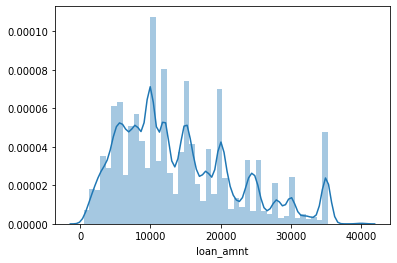

In [31]:
sns.distplot(df['loan_amnt'])

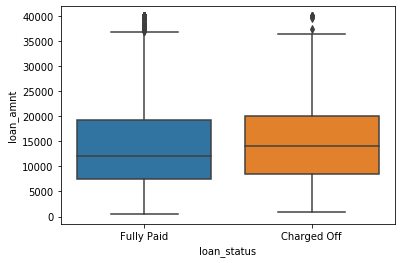

In [32]:
sns.boxplot(y='loan_amnt', data=df, x='loan_status')

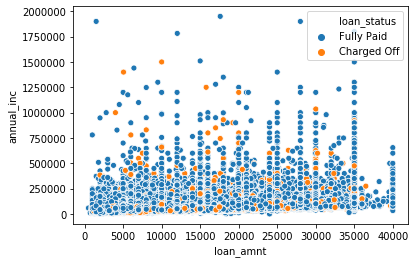

In [33]:
sns.scatterplot(y='annual_inc', x='loan_amnt', data=df[df['annual_inc']<2000000] , hue='loan_status')

### 2 - Term

In [34]:
pd.crosstab(df['term'],df['loan_status'], normalize='index').round(4)*100

loan_status,Charged Off,Fully Paid
term,,
36 months,15.77,84.23
60 months,31.94,68.06


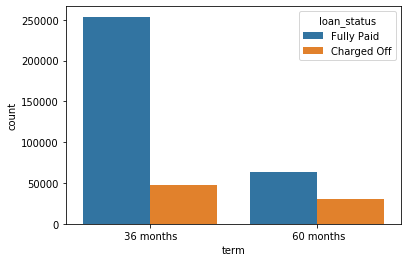

In [35]:
sns.countplot(x='term', data=df, hue='loan_status')

In [36]:
df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [37]:
dic={' 36 months':3,' 60 months':5}
df['term'] = df['term'].map(dic)

In [38]:
df.term.unique()

array([3, 5], dtype=int64)

### 3 - Int rate

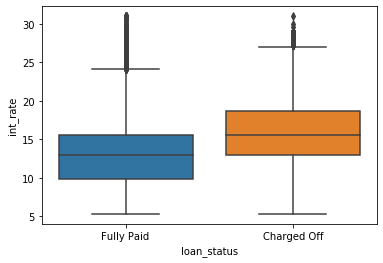

In [39]:
sns.boxplot(y='int_rate', data=df, x='loan_status')

In [40]:
#plt.figure(figsize=(12,8), dpi=200)
#sns.scatterplot(y='int_rate', x='loan_amnt', data=df[df['annual_inc']<2000000] , hue='loan_status', alpha=0.1)

In [41]:
df['ratio'] = df.loan_amnt / df.annual_inc * 100

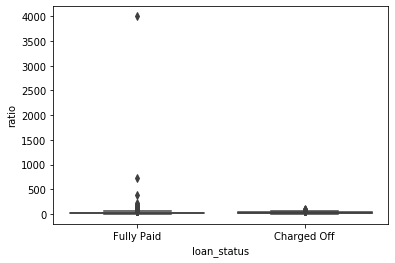

In [42]:
sns.boxplot(x='loan_status', y='ratio', data=df)

Se aprecia un outlier enorme

In [43]:
df.drop(df[df['ratio']>1000]['loan_status'].index, inplace=True)

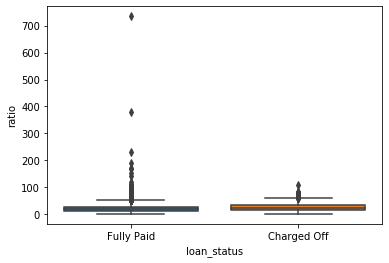

In [44]:
sns.boxplot(x='loan_status', y='ratio', data=df)

In [45]:
df.drop(df[df['ratio']>100].index, axis=0, inplace=True)

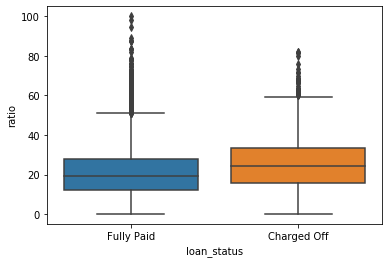

In [46]:
sns.boxplot(x='loan_status', y='ratio', data=df)

### 4 - Installment

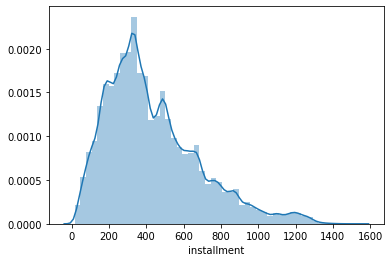

In [47]:
sns.distplot(df['installment'])

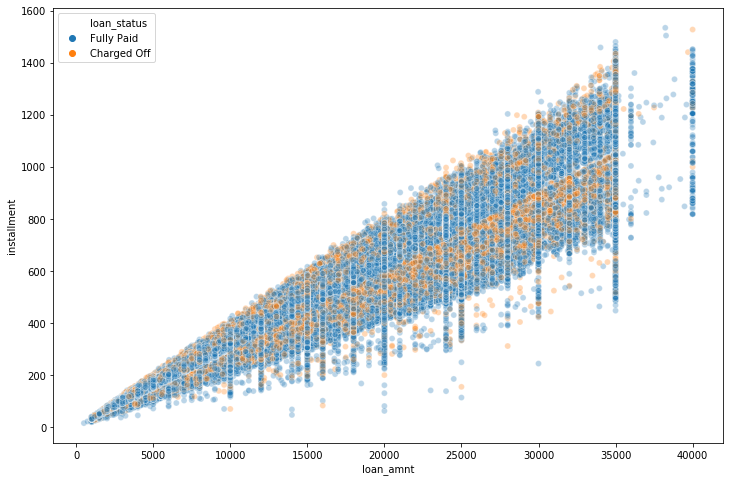

In [48]:
plt.figure(figsize=(12,8))
sns.scatterplot(y='installment', x='loan_amnt', data=df , hue='loan_status', alpha=0.3)

### 5/6 - Grade / Subgrade

In [49]:
df['grade'].value_counts()

B    115809
C    105772
A     64056
D     63360
E     31423
F     11738
G      3045
Name: grade, dtype: int64

In [50]:
df['sub_grade'].value_counts()

B3    26610
B4    25558
C1    23608
C2    22540
B2    22455
B5    22046
C3    21177
C4    20232
B1    19140
A5    18500
C5    18215
D1    15945
A4    15763
D2    13916
D3    12194
D4    11625
A3    10537
A1     9717
D5     9680
A2     9539
E1     7905
E2     7410
E3     6196
E4     5352
E5     4560
F1     3528
F2     2756
F3     2277
F4     1782
F5     1395
G1     1057
G2      752
G3      552
G4      371
G5      313
Name: sub_grade, dtype: int64

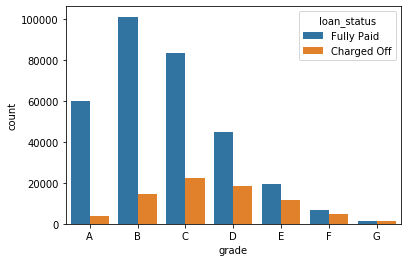

In [51]:
sns.countplot(x='grade', data=df, hue='loan_status', order=['A','B','C','D','E','F','G'])

In [52]:
pd.crosstab(df['grade'],df['loan_status'], normalize='index').round(4)*100

loan_status,Charged Off,Fully Paid
grade,,
A,6.29,93.71
B,12.57,87.43
C,21.19,78.81
D,28.87,71.13
E,37.38,62.62
F,42.79,57.21
G,47.85,52.15


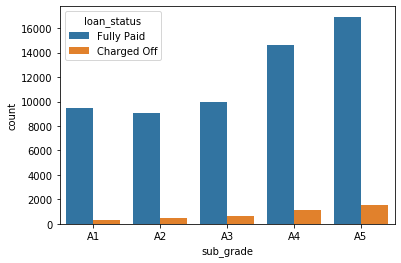

In [53]:
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=['A1','A2','A3','A4','A5'])

In [54]:
pd.crosstab(df['sub_grade'],df['loan_status'], normalize='index').round(4)*100

loan_status,Charged Off,Fully Paid
sub_grade,,
A1,2.87,97.13
A2,4.82,95.18
A3,5.81,94.19
A4,7.03,92.97
A5,8.50,91.50
B1,9.85,90.15
B2,10.84,89.16
B3,12.33,87.67
B4,13.85,86.15


In [55]:
df.sub_grade.unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

### 7 - Home ownership

In [56]:
df.home_ownership.value_counts()

MORTGAGE    198009
RENT        159393
OWN          37659
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [57]:
pd.crosstab(df['home_ownership'],df['loan_status'], normalize='index').round(4)*100

loan_status,Charged Off,Fully Paid
home_ownership,,
ANY,0.00,100.00
MORTGAGE,16.96,83.04
NONE,24.14,75.86
OTHER,14.55,85.45
OWN,20.68,79.32
RENT,22.67,77.33


No explica demasiada varianza, igual la voy a tener en cuenta.
Pero agrupando OTHER, OWN y RENT en OTHER

In [58]:
df['home_ownership'].replace(to_replace=['ANY','NONE'], value='OTHER', inplace=True)

In [59]:
pd.crosstab(df['home_ownership'],df['loan_status'], normalize='index').round(4)*100

loan_status,Charged Off,Fully Paid
home_ownership,,
MORTGAGE,16.96,83.04
OTHER,16.20,83.80
OWN,20.68,79.32
RENT,22.67,77.33


### 8 - Annual income

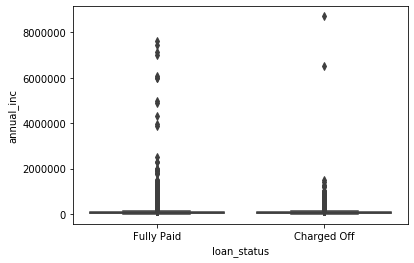

In [60]:
sns.boxplot(x='loan_status', y='annual_inc', data=df)

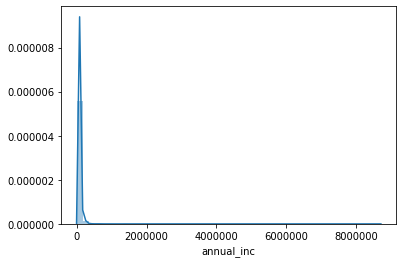

In [61]:
sns.distplot(df['annual_inc'])

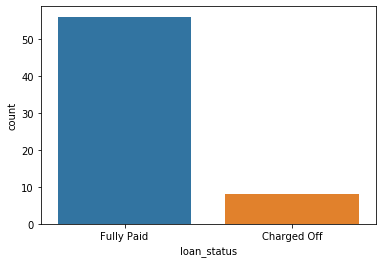

In [62]:
sns.countplot(x='loan_status', data=df[df['annual_inc']>1000000])

In [63]:
df.drop(df[df['annual_inc']>1000000].index, inplace=True)

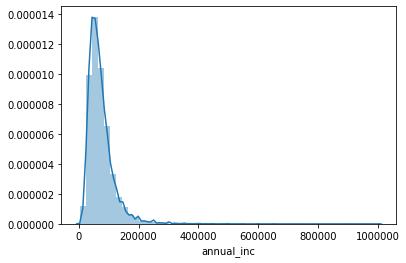

In [64]:
sns.distplot(df['annual_inc'])

In [65]:
df[df['annual_inc']>250000].shape

(3221, 25)

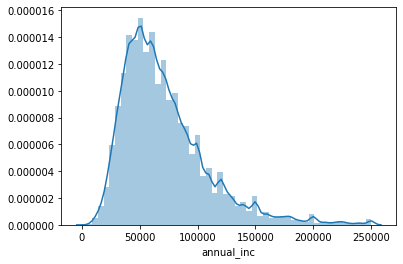

In [66]:
df.drop(df[df['annual_inc']>250000].index, inplace=True)
sns.distplot(df['annual_inc'])

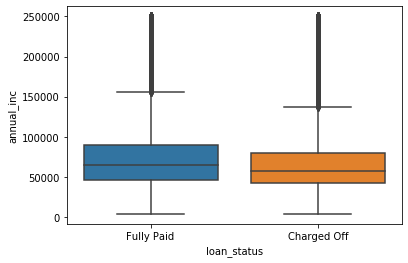

In [67]:
sns.boxplot(x='loan_status', y='annual_inc', data=df)

### 9 - Verification status - HACER DUMMIE

In [68]:
df.verification_status.value_counts()

Verified           137968
Source Verified    129706
Not Verified       124244
Name: verification_status, dtype: int64

In [69]:
pd.crosstab(df['verification_status'],df['loan_status'], normalize='index').round(4)*100

loan_status,Charged Off,Fully Paid
verification_status,,
Not Verified,14.62,85.38
Source Verified,21.56,78.44
Verified,22.43,77.57


HACER DUMMIE

### 10 - Mes de otorgacion

In [70]:
df['issue_d'] = pd.to_datetime(df['issue_d'])

In [71]:
df['issue_d'] = pd.DatetimeIndex(df['issue_d']).year
df['issue_d']

0         2015
1         2015
2         2015
3         2014
4         2013
          ... 
396025    2015
396026    2015
396027    2013
396028    2012
396029    2010
Name: issue_d, Length: 391918, dtype: int64

In [72]:
df['issue_d'].value_counts()

2014    101928
2013     96925
2015     93290
2012     40924
2016     27721
2011     17292
2010      9166
2009      3780
2008       887
2007         5
Name: issue_d, dtype: int64

In [73]:
# El mes de otorgacion es posterior a la otorgacion, por ende no deberia entrar en el modelo.

In [74]:
df.drop('issue_d', axis=1 , inplace=True)

### 11 - Purpose -> HACER DUMMIE

In [75]:
df['purpose'].value_counts()

debt_consolidation    232643
credit_card            82259
home_improvement       23423
other                  20837
major_purchase          8662
small_business          5549
car                     4646
medical                 4138
moving                  2816
vacation                2433
house                   2161
wedding                 1780
renewable_energy         326
educational              245
Name: purpose, dtype: int64

In [76]:
pd.crosstab(df['purpose'],df['loan_status'], normalize='index').round(4)*100

loan_status,Charged Off,Fully Paid
purpose,,
car,13.43,86.57
credit_card,16.75,83.25
debt_consolidation,20.79,79.21
educational,16.33,83.67
home_improvement,17.16,82.84
house,19.99,80.01
major_purchase,16.51,83.49
medical,21.77,78.23
moving,23.65,76.35


### 12 - Title  Eliminada

### 13 - dti

In [77]:
df['dti'].value_counts()

14.40    305
19.20    302
16.80    301
18.00    297
20.40    295
        ... 
46.72      1
49.55      1
42.39      1
57.14      1
41.25      1
Name: dti, Length: 4250, dtype: int64

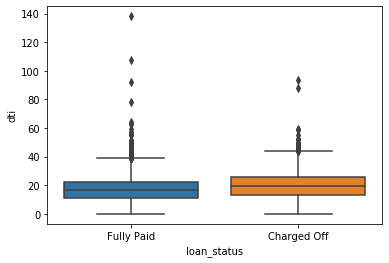

In [78]:
sns.boxplot(x='loan_status', y='dti', data=df)

### 14 - earliest_cr_line

In [79]:
df['earliest_cr_line'].value_counts()

Oct-2000    2994
Aug-2000    2915
Oct-2001    2872
Aug-2001    2865
Nov-2000    2712
            ... 
Jun-1959       1
Aug-1964       1
Jan-1944       1
May-1962       1
Jan-1957       1
Name: earliest_cr_line, Length: 683, dtype: int64

In [80]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['y_earliest_cr_line'] = pd.DatetimeIndex(df['earliest_cr_line']).year

In [81]:
df['y_earliest_cr_line'].value_counts()

2000    29135
2001    28866
1999    26253
2002    25705
2003    23519
        ...  
1951        3
1950        3
1953        2
1948        1
1944        1
Name: y_earliest_cr_line, Length: 65, dtype: int64

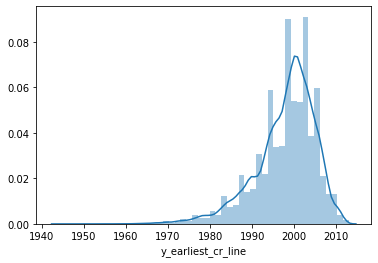

In [82]:
sns.distplot(df['y_earliest_cr_line'])

In [83]:
df.drop(df[df['y_earliest_cr_line']<1960].index, inplace=True)

In [84]:
df.drop('earliest_cr_line', axis=1, inplace=True)

### 16 - Open accounts

In [85]:
df['open_acc'].value_counts().head(15)

9.0     36470
10.0    35133
8.0     34858
11.0    32378
7.0     31079
12.0    28881
6.0     25719
13.0    24723
14.0    20930
5.0     18133
15.0    17157
16.0    14201
17.0    11478
4.0     10575
18.0     9336
Name: open_acc, dtype: int64

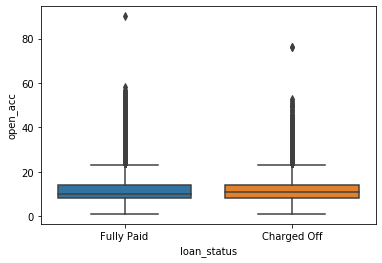

In [86]:
sns.boxplot(x='loan_status', y='open_acc', data=df)

In [87]:
df[df['open_acc']>65].T

,107918,273075,322027
loan_amnt,30000,20000,18950
term,5,3,5
int_rate,12.39,15.99,20.99
installment,673.27,703.05,512.56
grade,C,D,E
sub_grade,C1,D2,E4
home_ownership,MORTGAGE,MORTGAGE,RENT
annual_inc,115000,120000,47400
verification_status,Verified,Source Verified,Not Verified
loan_status,Fully Paid,Charged Off,Charged Off


In [88]:
df.drop(df[df['open_acc']>65].index, inplace=True)

### 17 - pub rec

In [89]:
df['pub_rec'].value_counts()

0.0     334500
1.0      49450
2.0       5407
3.0       1501
4.0        514
5.0        229
6.0        118
7.0         53
8.0         33
9.0         11
10.0        11
11.0         7
13.0         4
12.0         4
19.0         2
86.0         1
40.0         1
17.0         1
15.0         1
24.0         1
Name: pub_rec, dtype: int64

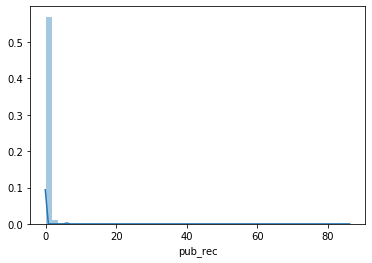

In [90]:
sns.distplot(df['pub_rec'])

In [91]:
df[df['pub_rec']>10]

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,pub_rec_bankruptcies,address,mort_acc_2,ratio,y_earliest_cr_line
16535,35000.0,3,16.99,1247.68,D,D1,RENT,125000.0,Verified,Fully Paid,...,32743.0,54.3,26.0,f,INDIVIDUAL,0.0,17945 Maria Field Suite 180\r\nWest Alexanderb...,0.0,28.000000,1998
45266,15000.0,3,18.24,544.10,D,D5,RENT,50000.0,Verified,Fully Paid,...,8701.0,38.0,14.0,f,INDIVIDUAL,0.0,"PSC 7638, Box 8594\r\nAPO AE 00813",1.0,30.000000,2000
58202,2000.0,3,16.99,71.30,D,D3,RENT,56000.0,Verified,Charged Off,...,11473.0,68.3,20.0,f,INDIVIDUAL,1.0,"70424 Angela Locks Apt. 819\r\nRobertchester, ...",0.0,3.571429,1998
90433,5000.0,3,18.92,183.08,D,D4,MORTGAGE,67500.0,Verified,Fully Paid,...,20408.0,78.2,34.0,w,INDIVIDUAL,0.0,"817 James Hollow\r\nTaylormouth, FL 30723",5.0,7.407407,1997
112187,5000.0,3,12.39,167.01,C,C1,RENT,52000.0,Verified,Charged Off,...,10349.0,61.6,19.0,w,INDIVIDUAL,1.0,"9766 Danny Key\r\nDeanton, MS 86630",0.0,9.615385,1998
127417,5950.0,3,23.43,231.66,F,F1,RENT,31000.0,Verified,Charged Off,...,2174.0,9.1,30.0,f,INDIVIDUAL,1.0,"953 Cannon Land Suite 627\r\nTurnerfort, FL 22690",2.0,19.193548,1987
145453,24000.0,3,11.99,797.03,B,B5,MORTGAGE,115000.0,Source Verified,Fully Paid,...,12603.0,40.5,48.0,w,INDIVIDUAL,0.0,"2479 Horn Turnpike Apt. 663\r\nKevinland, MT 0...",5.0,20.869565,1997
150704,28000.0,3,15.61,979.02,C,C4,RENT,101000.0,Verified,Fully Paid,...,9515.0,55.0,22.0,w,INDIVIDUAL,1.0,46634 Harrell Rapids Apt. 675\r\nNew Judyburgh...,0.0,27.722772,2003
162670,25000.0,3,15.41,871.67,D,D1,RENT,100000.0,Source Verified,Charged Off,...,11308.0,62.5,17.0,w,INDIVIDUAL,0.0,83738 Hernandez Mount Apt. 335\r\nJeremiahmout...,1.0,25.000000,1998
216146,20000.0,3,10.99,654.68,B,B4,MORTGAGE,125000.0,Source Verified,Fully Paid,...,8814.0,51.2,16.0,f,INDIVIDUAL,1.0,"6907 Benson Burg Apt. 181\r\nBrittneyborough, ...",0.0,16.000000,2003


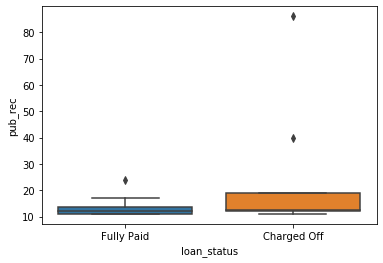

In [92]:
sns.boxplot(x='loan_status', y='pub_rec', data=df[df['pub_rec']>10])

In [93]:
df[df['pub_rec']>22]

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,pub_rec_bankruptcies,address,mort_acc_2,ratio,y_earliest_cr_line
127417,5950.0,3,23.43,231.66,F,F1,RENT,31000.0,Verified,Charged Off,...,2174.0,9.1,30.0,f,INDIVIDUAL,1.0,"953 Cannon Land Suite 627\r\nTurnerfort, FL 22690",2.0,19.193548,1987
218818,6400.0,3,13.18,216.20,C,C3,MORTGAGE,38000.0,Verified,Charged Off,...,7788.0,78.7,19.0,f,INDIVIDUAL,1.0,"32188 Teresa Ridges\r\nEast Kristishire, RI 30723",0.0,16.842105,1987
252783,22425.0,3,14.49,771.79,C,C4,MORTGAGE,96000.0,Verified,Fully Paid,...,15729.0,61.7,22.0,w,INDIVIDUAL,0.0,"50958 Bryant Green\r\nChristophermouth, TX 22690",3.0,23.359375,2000


In [94]:
df.drop(df[df['pub_rec']>22].index, inplace=True)

### 18 - revol bal

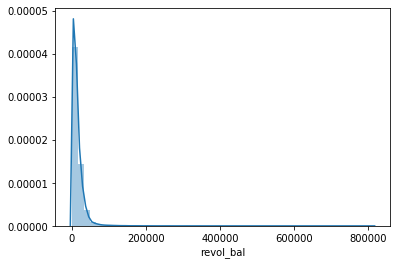

In [95]:
sns.distplot(df['revol_bal'])

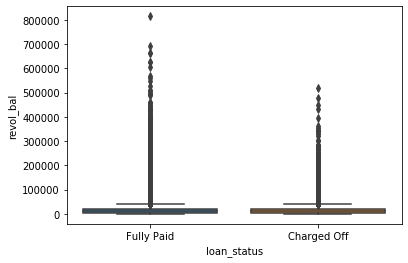

In [96]:
sns.boxplot(x='loan_status', y='revol_bal', data=df)

In [97]:
df[df['revol_bal']>100000]['loan_status'].value_counts()

Fully Paid     2113
Charged Off     352
Name: loan_status, dtype: int64

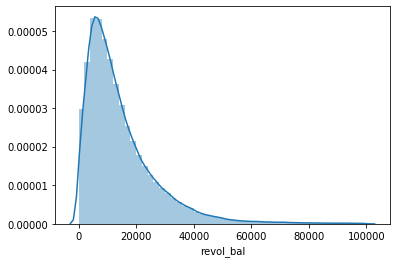

In [98]:
sns.distplot(df[df['revol_bal']<100000]['revol_bal'])

In [99]:
df.drop(df[df['revol_bal']>100000].index,inplace=True)

### 19 - revol util

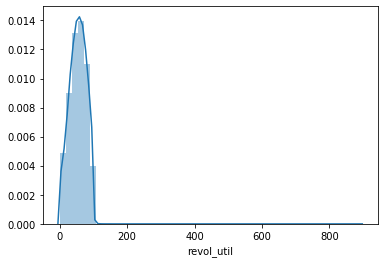

In [100]:
sns.distplot(df['revol_util'])

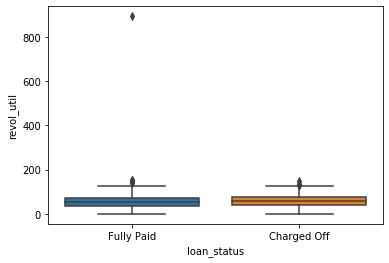

In [101]:
sns.boxplot(x='loan_status', y='revol_util', data=df)

In [102]:
df[df['revol_util']>200]['loan_status'].value_counts()

Fully Paid    1
Name: loan_status, dtype: int64

In [103]:
df.drop(df[df['revol_util']>200].index, inplace=True)

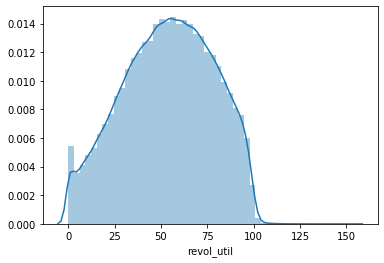

In [104]:
sns.distplot(df['revol_util'])

### 20 - total acc

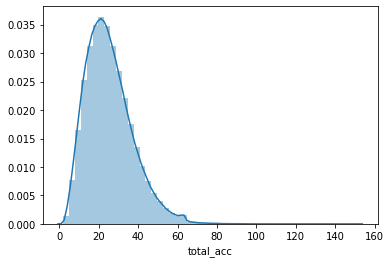

In [105]:
sns.distplot(df['total_acc'])

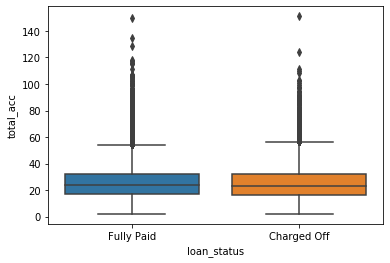

In [106]:
sns.boxplot(x='loan_status', y='total_acc', data=df)

In [107]:
df[df['total_acc']>100]['loan_status'].value_counts()

Fully Paid     22
Charged Off     8
Name: loan_status, dtype: int64

In [108]:
df.drop(df[df['total_acc']>100].index, inplace=True)

### 21 - initial list status

In [109]:
df['initial_list_status'].value_counts()

f    234171
w    155179
Name: initial_list_status, dtype: int64

In [110]:
pd.crosstab(df['initial_list_status'],df['loan_status'], normalize='index').round(4)*100

loan_status,Charged Off,Fully Paid
initial_list_status,,
f,19.38,80.62
w,20.18,79.82


In [111]:
df['initial_list_status'].unique()[0]

'w'

In [112]:
dic={df['initial_list_status'].unique()[0]:0,df['initial_list_status'].unique()[1]:1}
df['initial_list_status'] = df['initial_list_status'].map(dic)

In [113]:
df['initial_list_status'].unique()

array([0, 1], dtype=int64)

### 22 - application type -> HACER DUMMIE

In [114]:
df['application_type'].value_counts()

INDIVIDUAL    388662
JOINT            406
DIRECT_PAY       282
Name: application_type, dtype: int64

In [115]:
pd.crosstab(df['application_type'],df['loan_status'], normalize='index').round(4)*100

loan_status,Charged Off,Fully Paid
application_type,,
DIRECT_PAY,36.17,63.83
INDIVIDUAL,19.69,80.31
JOINT,12.81,87.19


In [116]:
# es muy sensible a este feature, debe hacerse dummie

### 23 - mort_acc_2

In [117]:
df['mort_acc_2'].value_counts()

0.000000    139142
1.000000     59697
2.000000     49018
3.000000     37122
4.000000     27109
             ...  
3.720588         1
2.800000         1
3.015267         1
2.026316         1
3.278481         1
Name: mort_acc_2, Length: 108, dtype: int64

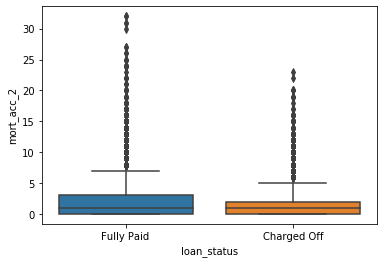

In [118]:
sns.boxplot(x='loan_status', y='mort_acc_2', data=df)

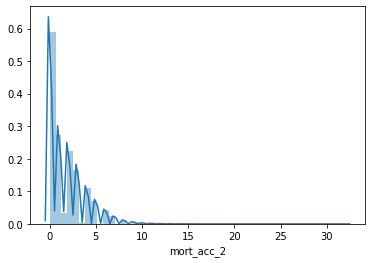

In [120]:
sns.distplot(df['mort_acc_2'])

In [121]:
#df.drop(df[df['mort_acc_2']>12].index, inplace=True)

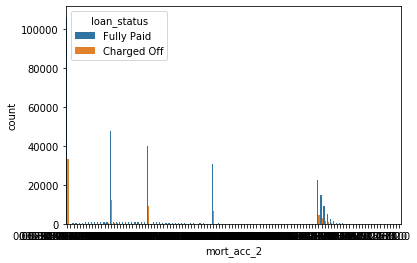

In [122]:
sns.countplot(x='mort_acc_2', hue='loan_status', data=df)

### 24 public rec bankruptcies

In [123]:
df['pub_rec_bankruptcies'].value_counts()

0.0    344412
1.0     42620
2.0      1841
3.0       350
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

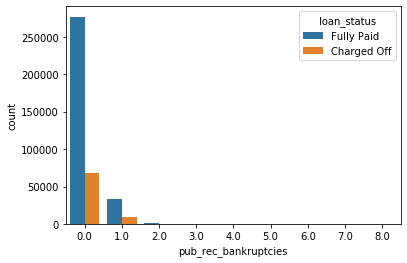

In [124]:
sns.countplot(x='pub_rec_bankruptcies', hue='loan_status', data=df)

### 25 - Address

In [125]:
df['address'].value_counts()

USS Johnson\r\nFPO AE 48052                                  8
USS Smith\r\nFPO AP 70466                                    8
USCGC Smith\r\nFPO AE 70466                                  8
USNS Johnson\r\nFPO AE 05113                                 8
USNS Johnson\r\nFPO AP 48052                                 7
                                                            ..
1465 Charles Cove Suite 457\r\nNorth Timothyton, WI 05113    1
913 Deborah Island\r\nBakerland, VA 29597                    1
Unit 6643 Box 9304\r\nDPO AP 30723                           1
70266 Billy Canyon Apt. 346\r\nEast April, IL 05113          1
69372 Vanessa Highway Suite 347\r\nNew Melissa, NC 00813     1
Name: address, Length: 387095, dtype: int64

In [126]:
#df.drop_duplicates(inplace=True) no eliminar todavia, extraer el zipcode

In [127]:
df['zip'] = df['address'].str[-5:]

In [128]:
df.zip

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: zip, Length: 389350, dtype: object

In [129]:
df.zip.nunique()

10

In [130]:
df.drop('address', axis=1, inplace=True)

## Dummies

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389350 entries, 0 to 396029
Data columns (total 24 columns):
loan_amnt               389350 non-null float64
term                    389350 non-null int64
int_rate                389350 non-null float64
installment             389350 non-null float64
grade                   389350 non-null object
sub_grade               389350 non-null object
home_ownership          389350 non-null object
annual_inc              389350 non-null float64
verification_status     389350 non-null object
loan_status             389350 non-null object
purpose                 389350 non-null object
dti                     389350 non-null float64
open_acc                389350 non-null float64
pub_rec                 389350 non-null float64
revol_bal               389350 non-null float64
revol_util              389350 non-null float64
total_acc               389350 non-null float64
initial_list_status     389350 non-null int64
application_type        389350 non-

In [132]:
arbol + perro

NameError: name 'arbol' is not defined

## Chequeo los tipos

In [133]:
df.dtypes[df.dtypes=='object']

grade                  object
sub_grade              object
home_ownership         object
verification_status    object
loan_status            object
purpose                object
application_type       object
zip                    object
dtype: object

### Las siguientes columnas seran eliminadas

1) grade

In [134]:
df.drop('grade',axis=1, inplace=True)

## Las siguientes columnas seran transformadas en DUMMIES

In [135]:
'''
sub_grade              object
home_ownership         object
verification_status    object
loan_status            object
purpose                object
application_type       object
zip                    object
'''

'\nsub_grade              object\nhome_ownership         object\nverification_status    object\nloan_status            object\npurpose                object\napplication_type       object\nzip                    object\n'

In [136]:
df.drop('grade',axis=1, inplace=True)

KeyError: "['grade'] not found in axis"

In [137]:
dummie_cols = ['sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'application_type', 'zip']

In [138]:
dummies = pd.get_dummies(df[dummie_cols], drop_first=True)

In [139]:
dummies.columns

Index(['sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5',
       'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4',
       'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3',
       'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2',
       'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1',
       'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5',
       'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4',
       'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3',
       'sub_grade_G4', 'sub_grade_G5', 'home_ownership_OTHER',
       'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'loan_status_Fully Paid', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', '

In [140]:
dummies.shape

(389350, 64)

In [141]:
df.shape

(389350, 23)

In [142]:
df.drop(dummie_cols, axis=1, inplace=True)

In [143]:
df.shape

(389350, 16)

In [144]:
df = pd.concat([df, dummies], axis=1)

In [145]:
df.shape

(389350, 80)

In [146]:
X = df.drop('loan_status_Fully Paid', axis=1).values

In [147]:
y = df['loan_status_Fully Paid'].values

In [148]:
arbol + perro

NameError: name 'arbol' is not defined

## Train test split

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:
X_train.shape, X_test.shape

((311480, 79), (77870, 79))

In [182]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [183]:
scaler = StandardScaler()

In [184]:
X_train = scaler.fit_transform(X_train)

In [185]:
X_test = scaler.transform(X_test)

## Creacion de la Red Neuronal

In [201]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [212]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=25, verbose=1)

In [222]:
model = Sequential()

# input layer
model.add(Dense(80,  activation='relu'))

# hidden layer
model.add(Dense(60, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(10, activation='relu'))

# hidden layer
model.add(Dense(5, activation='relu'))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

## Fit Modelo

In [223]:
model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), batch_size=256, class_weight='auto', callbacks=[early_stop])

Train on 311480 samples, validate on 77870 samples
Epoch 1/200
311480/311480 [==============================] - 9s 29us/sample - loss: 0.2907 - val_loss: 0.2579
Epoch 2/200
311480/311480 [==============================] - 10s 31us/sample - loss: 0.2611 - val_loss: 0.2562
Epoch 3/200
311480/311480 [==============================] - 8s 27us/sample - loss: 0.2588 - val_loss: 0.2560
Epoch 4/200
311480/311480 [==============================] - 9s 28us/sample - loss: 0.2579 - val_loss: 0.2566
Epoch 5/200
311480/311480 [==============================] - 9s 30us/sample - loss: 0.2568 - val_loss: 0.2550
Epoch 6/200
311480/311480 [==============================] - 9s 29us/sample - loss: 0.2561 - val_loss: 0.2552
Epoch 7/200
311480/311480 [==============================] - 8s 26us/sample - loss: 0.2556 - val_loss: 0.2550
Epoch 8/200
311480/311480 [==============================] - 7s 23us/sample - loss: 0.2551 - val_loss: 0.2551
Epoch 9/200
311480/311480 [==============================] - 6s 20us

In [224]:
model.history.history


#loss: 0.2575 - val_loss: 0.2563

#loss: 0.2585 - val_loss: 0.2562

# acc 0.8043

#acc 0.8045



{'loss': [0.290744295376814,
  0.26112967002632165,
  0.258802675809728,
  0.25792536704993696,
  0.2567616255151394,
  0.2560621446978071,
  0.255550898724639,
  0.25511167110336813,
  0.25454578487071206,
  0.2542252059265755,
  0.2539997492581166,
  0.25305810946278934,
  0.2526315962290816,
  0.2522816008308725,
  0.25194969114327104,
  0.2514456201919285,
  0.25106019438866917,
  0.25058611869674235,
  0.25009068254253686,
  0.24961334695264312,
  0.24940882446991858,
  0.24882841840916456,
  0.24843058653747038,
  0.24815485358613285,
  0.2479805875719321,
  0.24732049160022337,
  0.2472278153714923,
  0.2470197646707752,
  0.24638130482459875,
  0.246294740502605,
  0.2457933122874133,
  0.2457332964402438,
  0.24526646343331687,
  0.2453271153654568,
  0.24494759517157202,
  0.24454226619328984],
 'val_loss': [0.25791092890132844,
  0.25623600224031323,
  0.25598301141286856,
  0.2565848807556356,
  0.25503592261671637,
  0.25523266838223635,
  0.25496896841115146,
  0.25509642

In [225]:
loss = pd.DataFrame(model.history.history)

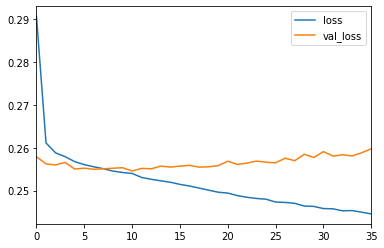

In [226]:
loss.plot()

In [227]:
from sklearn.metrics import confusion_matrix, classification_report

In [228]:
y_pred = model.predict_classes(X_test)

In [229]:
confusion_matrix(y_test, y_pred)

array([[ 7182,  8121],
       [  535, 62032]], dtype=int64)

In [230]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.47      0.62     15303
           1       0.88      0.99      0.93     62567

    accuracy                           0.89     77870
   macro avg       0.91      0.73      0.78     77870
weighted avg       0.89      0.89      0.87     77870



In [244]:
model.save('C:\\Users\\GCBA\\Desktop\\Udemy\\Udemy 5 - TF Keras\\03-ANNs\\mi_modelo_2.h5')

In [245]:
from tensorflow.keras.models import load_model

In [247]:
#modelo = load_model('mi_modelo_2.h5')